In [291]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

## Домашнее задание

Задание   
Исследование данных о качестве вина ( [Wine Quality Dataset](https://archive.ics.uci.edu/static/public/186/wine+quality.zip)):  
Проведите первичный анализ данных: изучите типы переменных, наличие пропусков, статистические характеристики.  
 - Визуализируйте распределение количественных переменных с помощью гистограмм и box plot.
 - Постройте столбчатые диаграммы для анализа распределения категориальных переменных .
 - Сделайте выводы о качестве данных и потенциальных взаимосвязях.


### Первичный анализ данных 

In [6]:
df_red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
df_white_wine = pd.read_csv('winequality-white.csv', delimiter=';')
df_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Оба датасета имеют одинаковое количество столбцов. Рассмотрим описания этих характеристик:

fixed acidity: фиксированная (нелетучая, не испаряется легко) кислотность в вине,
volatile acidity: летучая кислотность – суммарная концентрация всех летучих кислот (главная уксусная – до 90%),
citric acid: количество лимонной кислоты,
residual sugar: количество сахара, которое остаётся в вине после завершения процесса ферментации,
chlorides: количества соли в вине,
free sulfur dioxide: количество свободного диоксида серы,
total sulfur dioxide : общее количество свободных и связанных форм SO2,
density: плотность вина,
pH: кислотность по шкале pH,
sulphates: количество солей сернистой кислоты,
alcohol: процентное содержание алкоголя в вине.
quality: качество (оценка от 0 до 10).

In [14]:
#Посмотрим информацию о датасетах
df_red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
df_red_wine.duplicated().sum()

240

In [9]:
df_white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [16]:
df_white_wine.duplicated().sum()

937

Оба датасета имеют 10 переменных типа float64, что означает, что они содержат непрерывные числовые значения. Целевая переменная quality - имеет   целочисленный тип данных (int64), то есть она дискретна и ее можно отнести к категориальному признаку. Пропущенных значений нет, дубликаты есть, но так как названий вина нет в датасете, то дубликаты могут быть просто совпадениями характеристик вина, относящиеся к разным винам, и удалить мы их не можем. 

### Статистические характеристики признаков

In [ ]:
Посмотрим статистические характеристики датасетов:           

In [11]:
df_red_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [13]:
df_white_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


Визуализируем сравнительные распределения характеристик красных и белых вин, что бы понять, есть ли статистические различия и можно ли объединить их в один датасет. Так как количество белых вин в 3 раза больше красных, для построения гистограмм будем использовать не количество характеристик, а их процент по отношению ко всему датасету.

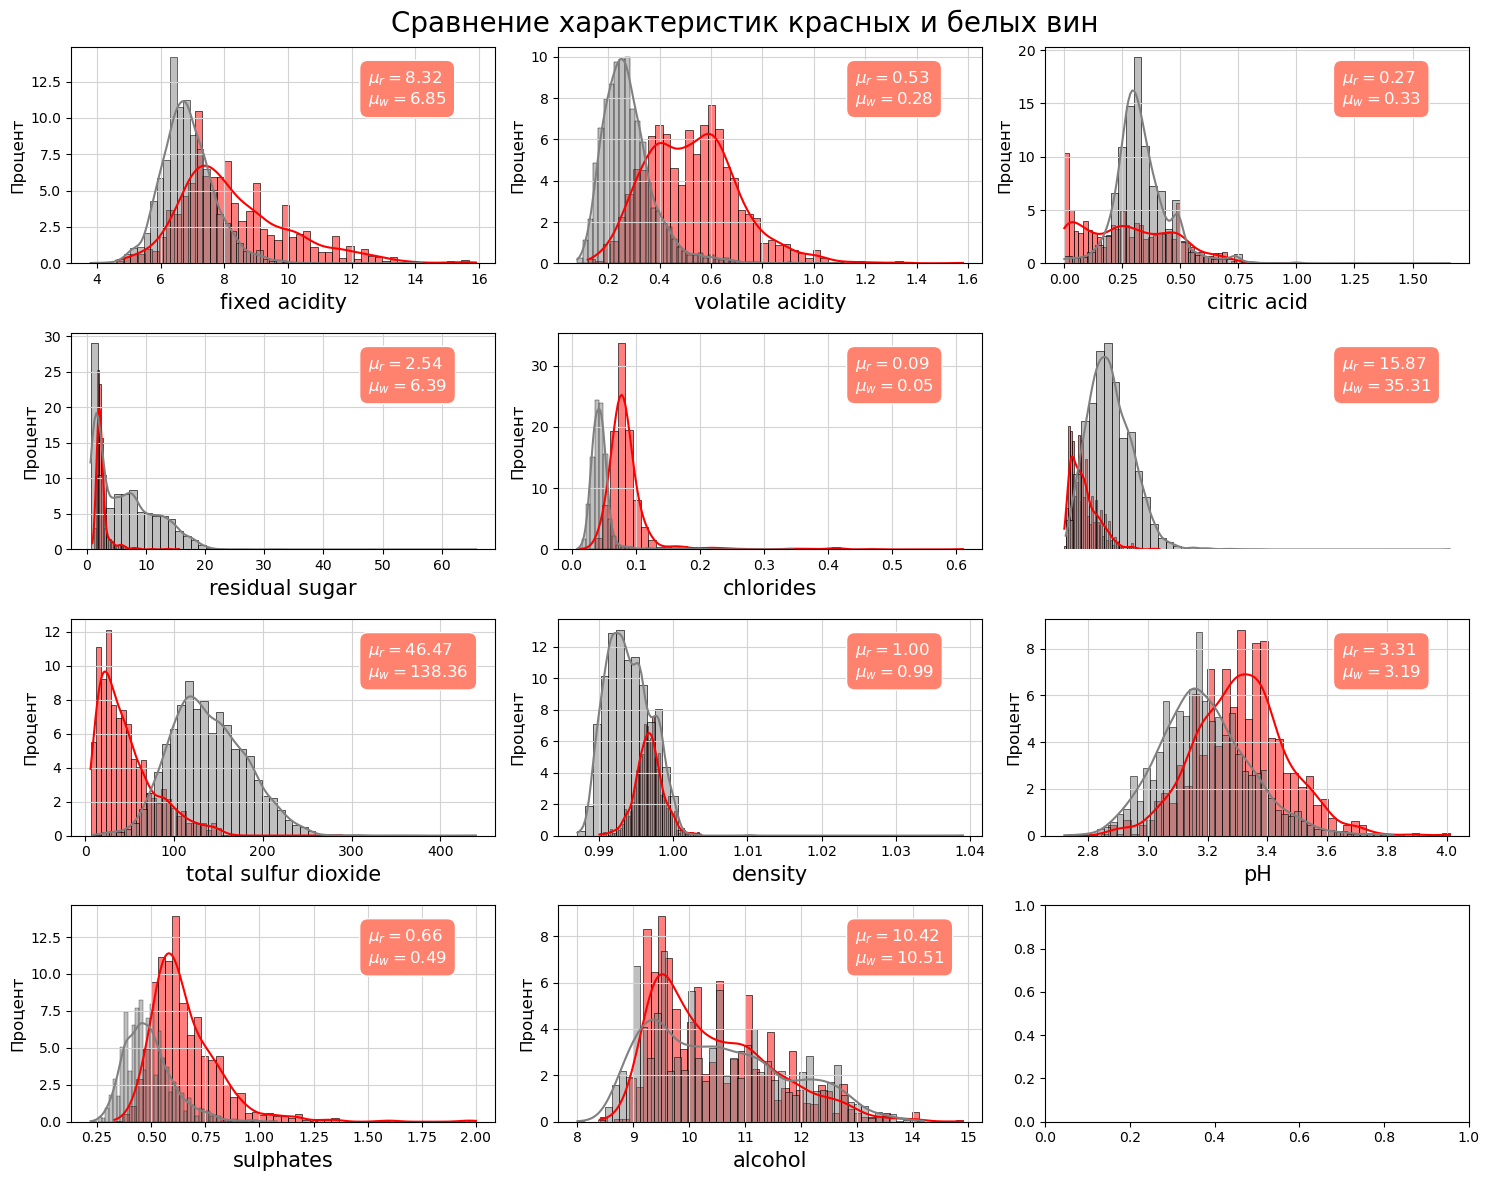

In [144]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(df_red_wine.columns[:-1]):
    x = i // 3
    y = i % 3
    sns.histplot(data=df_red_wine, x=col, bins=50, kde=True, ax=ax[x, y], color='red', stat='percent')
    sns.histplot(data=df_white_wine, x=col, bins=50, kde=True, ax=ax[x, y], color='grey', stat='percent')
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Процент', fontsize=12)
    ax[x, y].grid(color='lightgrey')

    textstr = '\n'.join((
        r'$\mu_r=%.2f$' % df_red_wine[col].mean(),
        r'$\mu_w=%.2f$' % df_white_wine[col].mean()
    ))
    ax[x, y].text(0.7, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Сравнение характеристик красных и белых вин', fontsize=20)
plt.tight_layout()

plt.show()


Форма распределения одинаковых характеристик у красных и белых вин подобные, кроме volatile acidity, citric acid, residual sugar. Средние значения всех рахактиристик отличаются, самая большая разницу мы можем увидеть в total sulfur dioxide ( в белых винах в 2,97 раза больше), residual sugar  (в белых винах в 2,52 раза больше), free sulfur dioxide (в белых винах в 2,22 раза больше). При первом взгляде можно заключить, что статистически датасеты различаются, и объединить их нельзя, нужно анализировать по отдельности. Проверим это предположение при помощи ттеста:

In [127]:
from scipy import stats
alpha=0.05
for col in df_red_wine.columns:
    t_check=stats.ttest_ind(df_red_wine[col],df_white_wine[col])
    if(t_check[1]<alpha):
        print(f'{col} red_wine отличается от white_wine')

fixed acidity red_wine отличается от white_wine
volatile acidity red_wine отличается от white_wine
citric acid red_wine отличается от white_wine
residual sugar red_wine отличается от white_wine
chlorides red_wine отличается от white_wine
free sulfur dioxide red_wine отличается от white_wine
total sulfur dioxide red_wine отличается от white_wine
density red_wine отличается от white_wine
pH red_wine отличается от white_wine
sulphates red_wine отличается от white_wine
alcohol red_wine отличается от white_wine
quality red_wine отличается от white_wine


In [ ]:
Результаты подтверждают предположение. 

### Одномерный анализ числовых переменных

Рассмотрим датасет с красными винами:

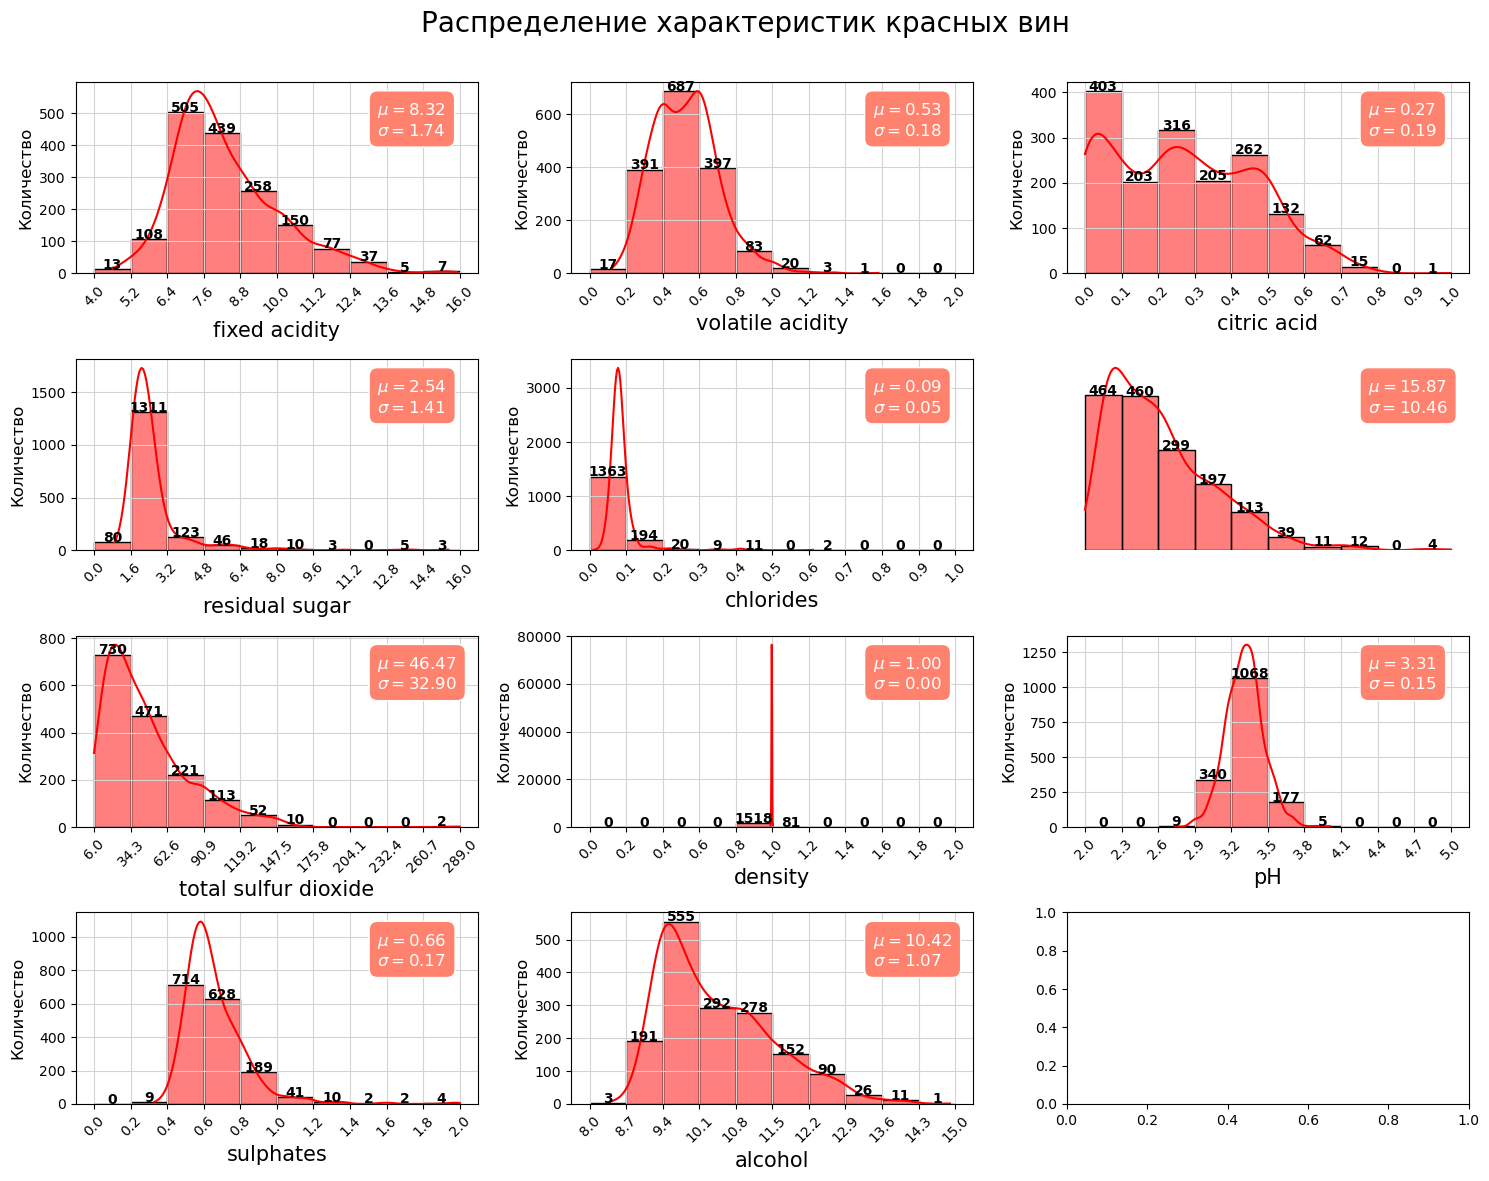

In [153]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(df_red_wine.columns[:-1]):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_red_wine[col],
                                     range=(np.floor(df_red_wine[col].min()), np.ceil(df_red_wine[col].max())))

    graph = sns.histplot(data=df_red_wine, x=col, bins=bin_edges, kde=True, ax=ax[x, y], color='red')
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_red_wine[col].mean(),
        r'$\sigma=%.2f$' % df_red_wine[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение характеристик красных вин', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


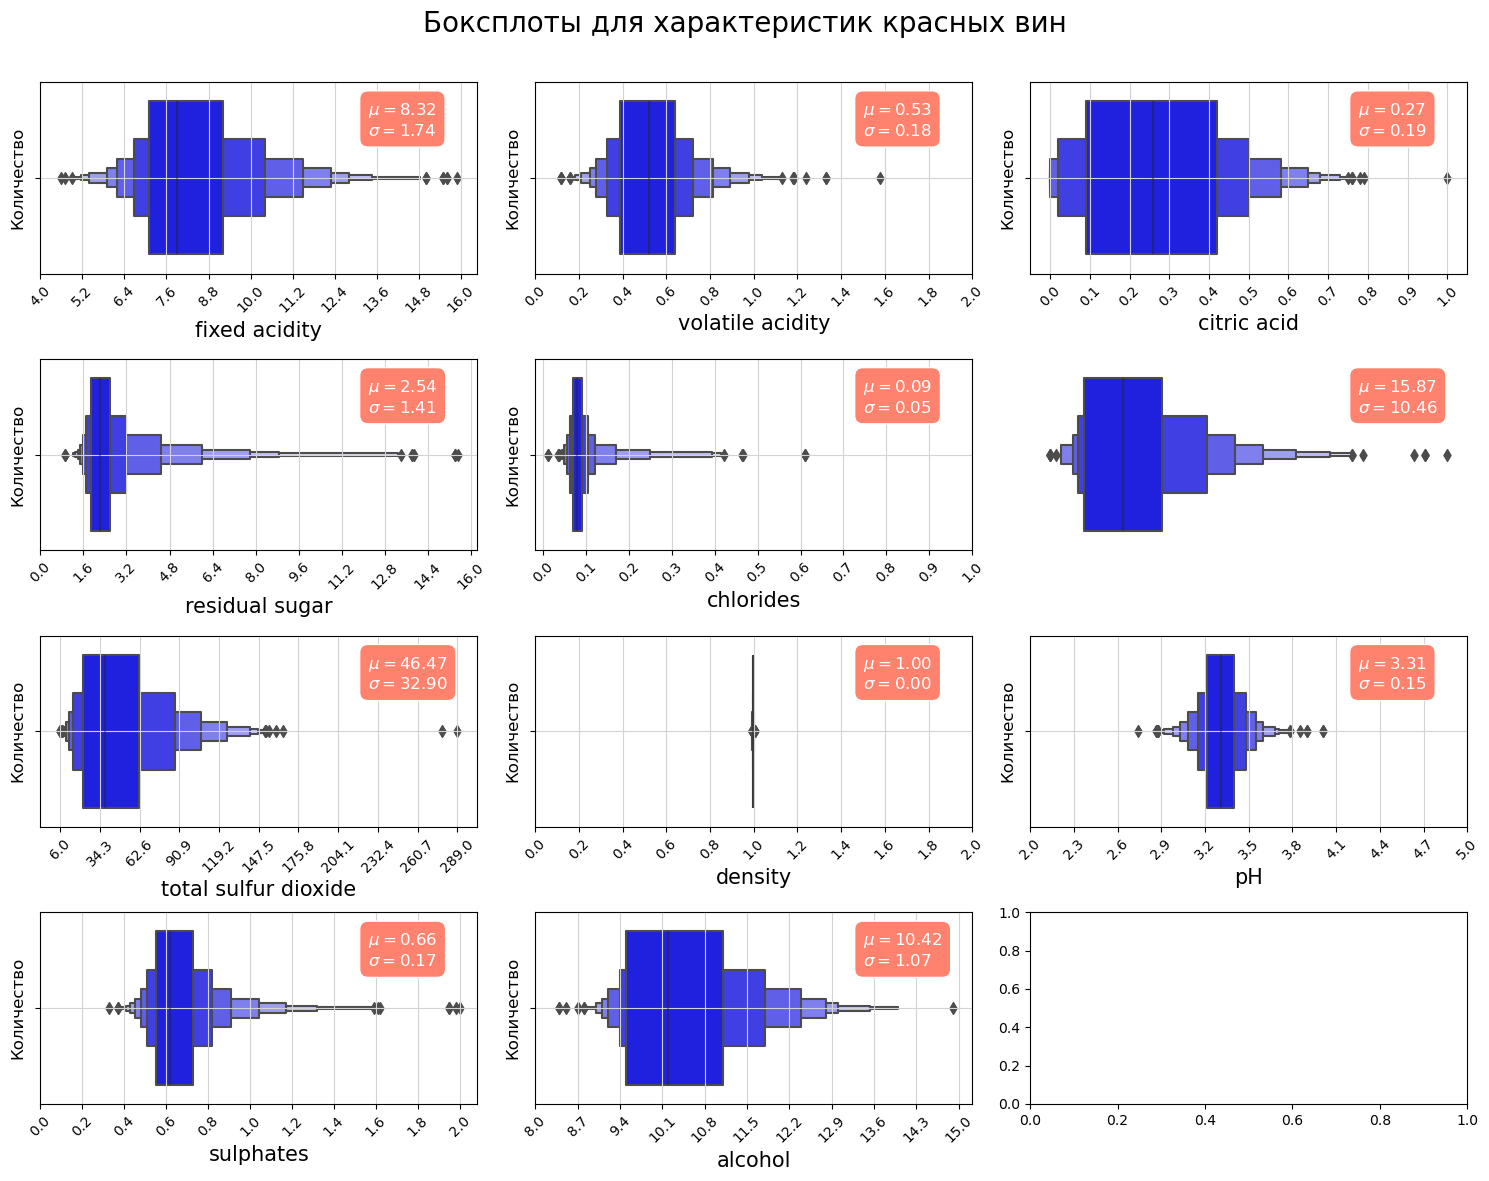

In [154]:
#Построим боксплоты для числовых переменных
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

# Цикл для построения боксплота для каждого числового признака
for i, col in enumerate(df_red_wine.columns[:-1]):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_red_wine[col],
                                     range=(np.floor(df_red_wine[col].min()), np.ceil(df_red_wine[col].max())))

    graph = sns.boxenplot(data=df_red_wine, x=col, ax=ax[x, y], color='blue')
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_red_wine[col].mean(),
        r'$\sigma=%.2f$' % df_red_wine[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Боксплоты для характеристик красных вин', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


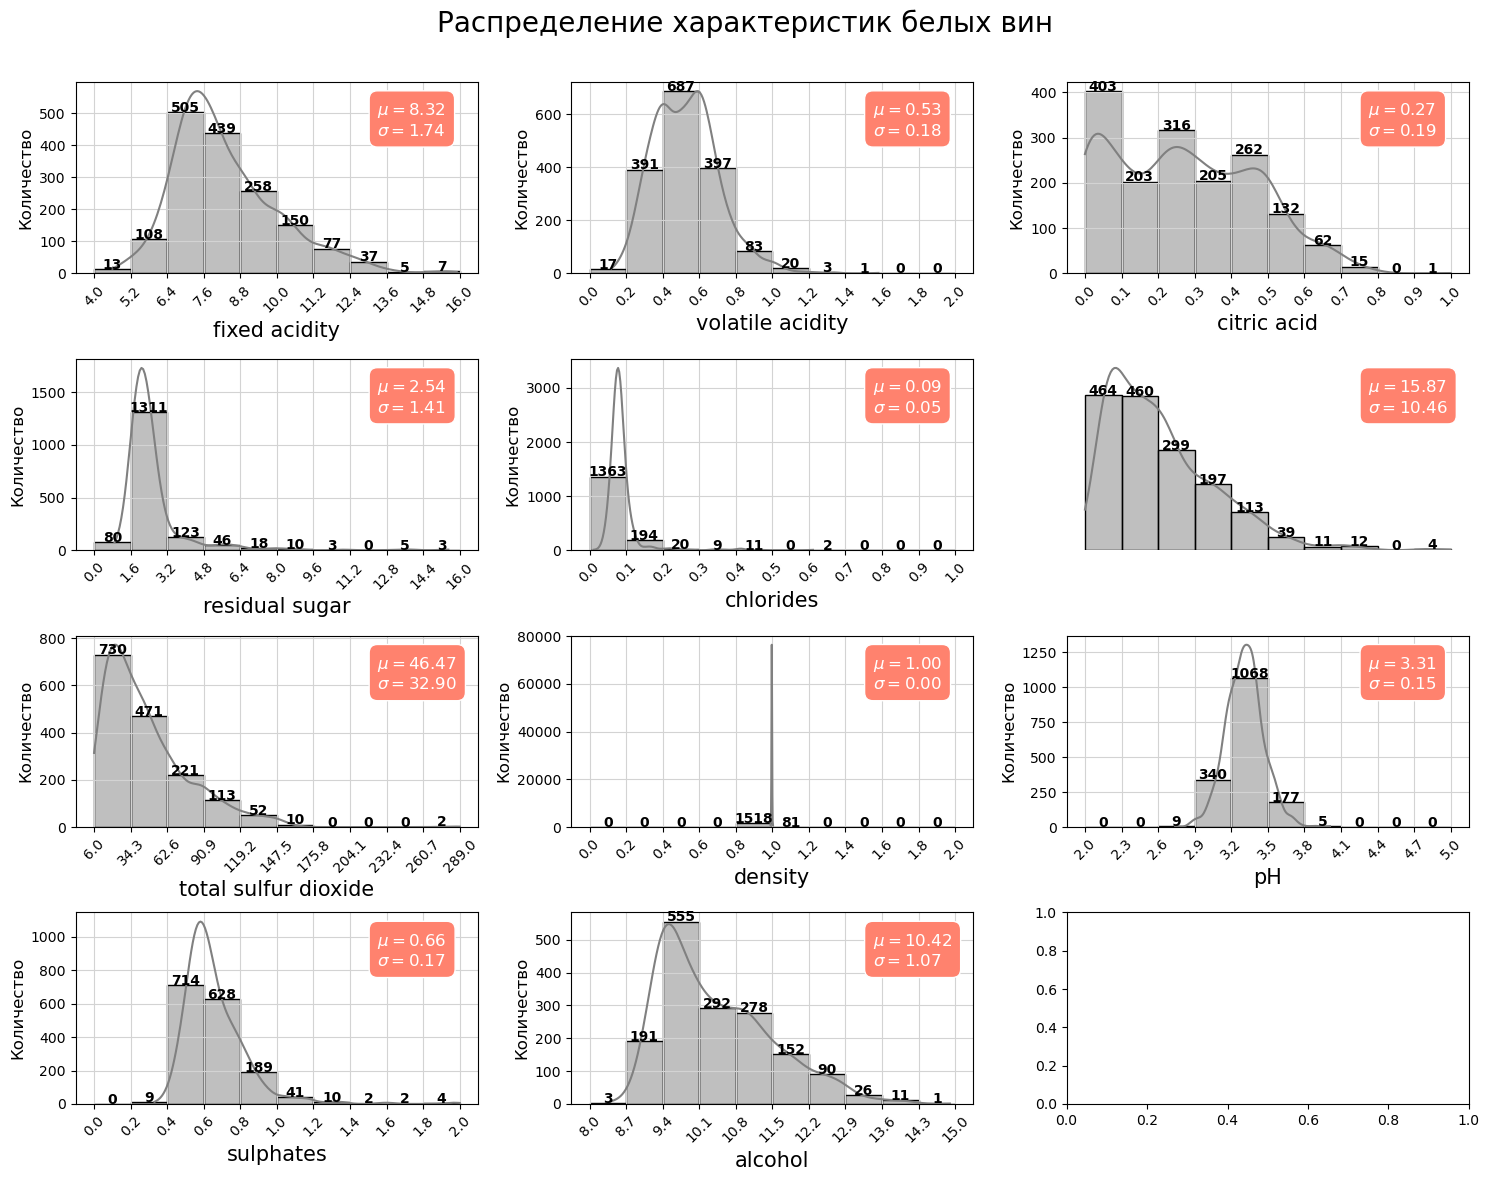

In [156]:
#сделаем то же самое для белых вин
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(df_red_wine.columns[:-1]):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_red_wine[col],
                                     range=(np.floor(df_red_wine[col].min()), np.ceil(df_red_wine[col].max())))

    graph = sns.histplot(data=df_red_wine, x=col, bins=bin_edges, kde=True, ax=ax[x, y], color='grey')
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_red_wine[col].mean(),
        r'$\sigma=%.2f$' % df_red_wine[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение характеристик белых вин', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


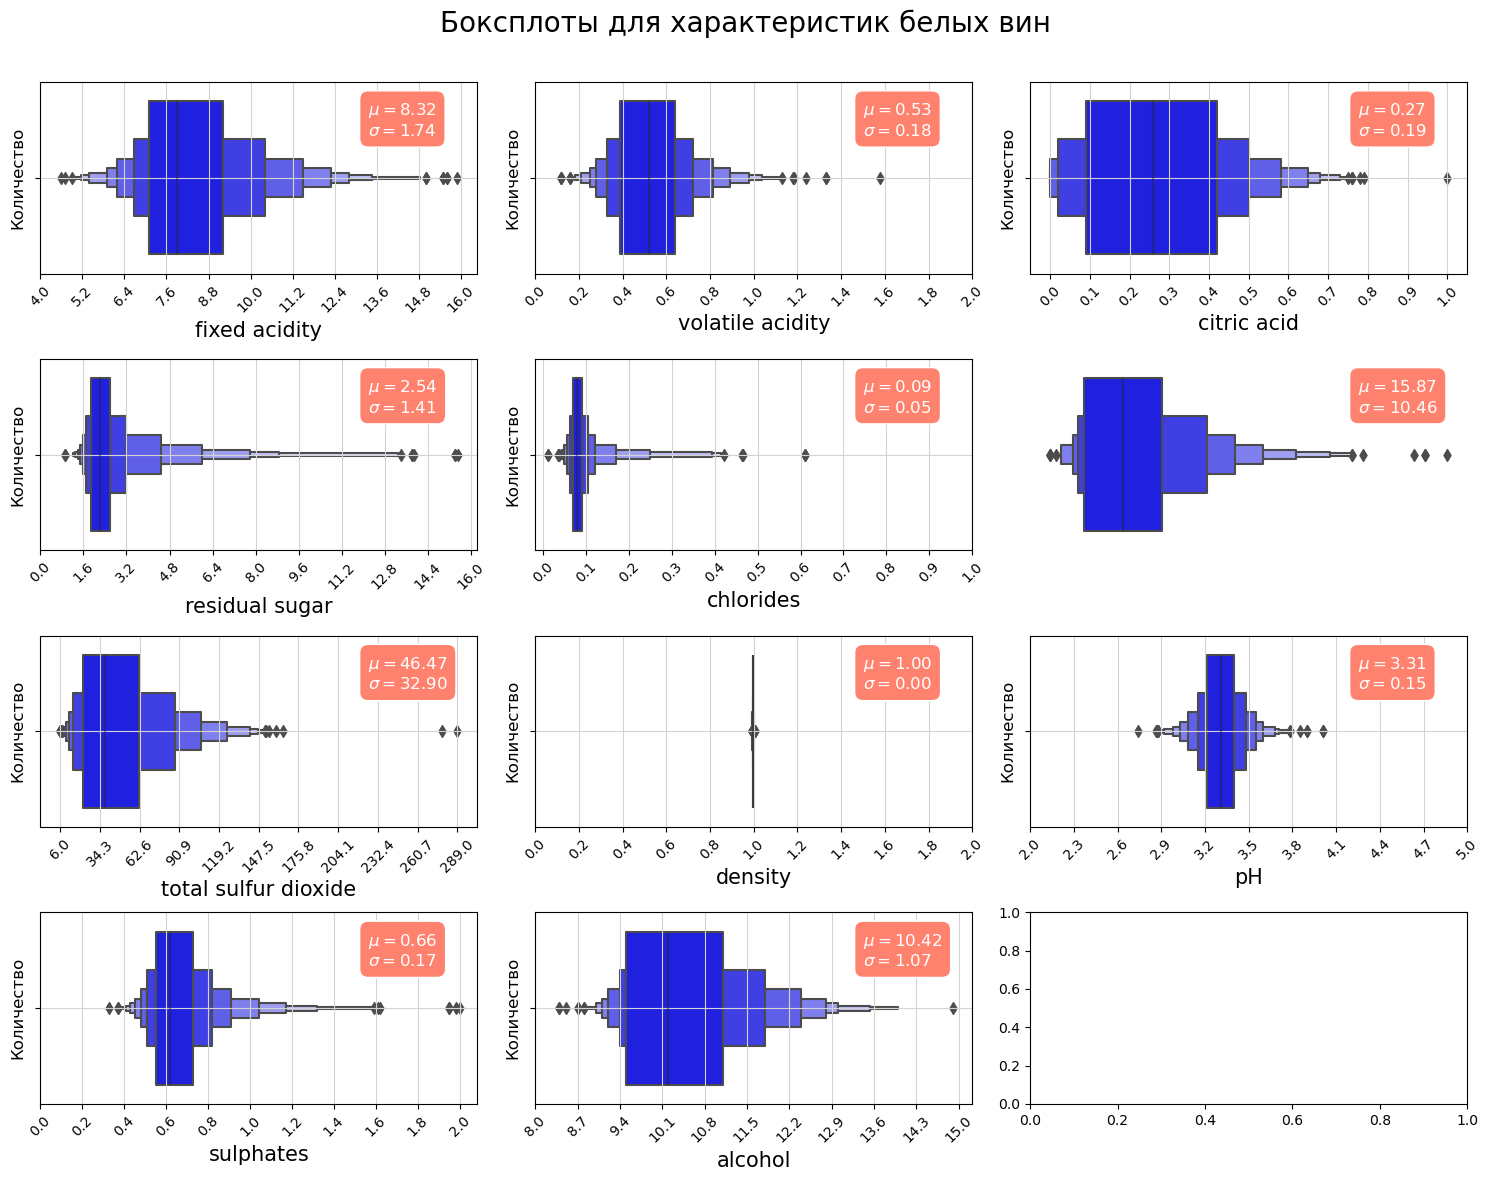

In [157]:
#Построим боксплоты для числовых переменных
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

# Цикл для построения боксплота для каждого числового признака
for i, col in enumerate(df_red_wine.columns[:-1]):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_red_wine[col],
                                     range=(np.floor(df_red_wine[col].min()), np.ceil(df_red_wine[col].max())))

    graph = sns.boxenplot(data=df_red_wine, x=col, ax=ax[x, y], color='blue')
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_red_wine[col].mean(),
        r'$\sigma=%.2f$' % df_red_wine[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Боксплоты для характеристик белых вин', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


Типы распределения видны на графиках, средние значения и дисперсии тоже. Так же можно увидеть значения, сильно выходящий на рамки обычных, но для принятия решения, насколько они относятся к выбросам, нужно проконсультироваться со специалистами по винам.

### Одномерный анализ категориальных переменных

категориальная переменная у нас одна, quality, она же целевая. Посмотрим на ее гистограмму в сравнении двух датасетов. 

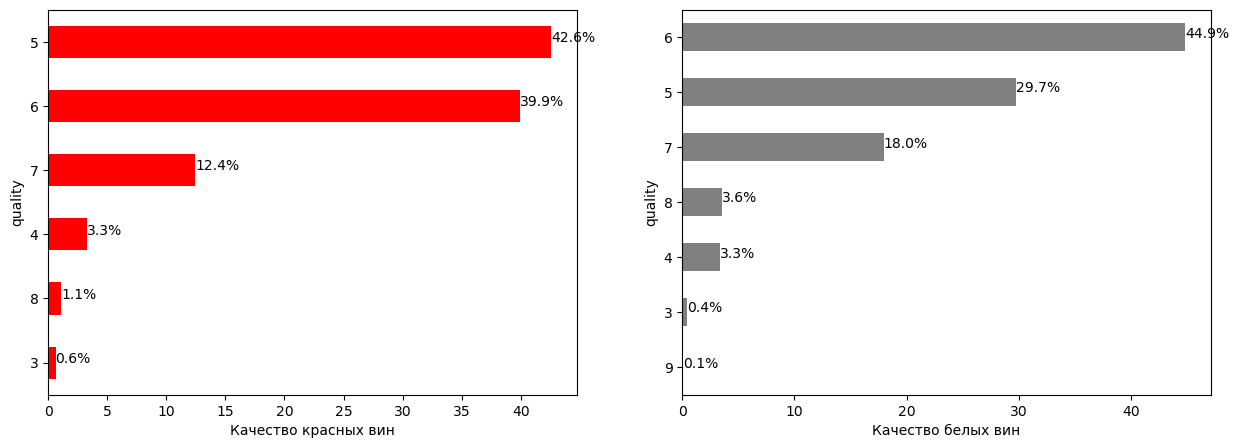

In [265]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Вычисление процентных значений частоты красных вин
value_counts_red = df_red_wine.quality.value_counts(normalize=True).mul(100).sort_values()

# Построение столбчатой диаграммы
value_counts_red.plot(kind='barh', width=0.5, color='red', ax=ax[0])
for index, value in enumerate(value_counts_red):
        ax[0].text(value, index, str(round(value, 1)) + '%', fontsize=10)
        ax[0].set_xlabel('Качество красных вин', fontsize=10)

# Вычисление процентных значений частоты белых вин
value_counts_white = df_white_wine.quality.value_counts(normalize=True).mul(100).sort_values()

# Построение столбчатой диаграммы
value_counts_white.plot(kind='barh', width=0.5, color='grey', ax=ax[1])
for index, value in enumerate(value_counts_white):
        ax[1].text(value, index, str(round(value, 1)) + '%', fontsize=10)
        ax[1].set_xlabel('Качество белых вин', fontsize=10)
                              

In [268]:
#средняя оценка белых вин
df_white_wine.quality.mean().round(2)

5.88

In [269]:
#средняя оценка красных вин
df_red_wine.quality.mean().round(2)

5.64

По результатам гистограммы видим, что красных вин больше всего с оценкой качества равной 5 - 42,6%, а белых вин больше всего с оценкой 6 - 44,9%. Кроме того с оценкой 7 и 8 белых вин так же больше, и даже у них есть 0,1% вин с оценкой 9. В общем можно заключить, что оценки белых вин выше, что подтверждает их средняя оценка.

### Двумерный анализ количественных признаков

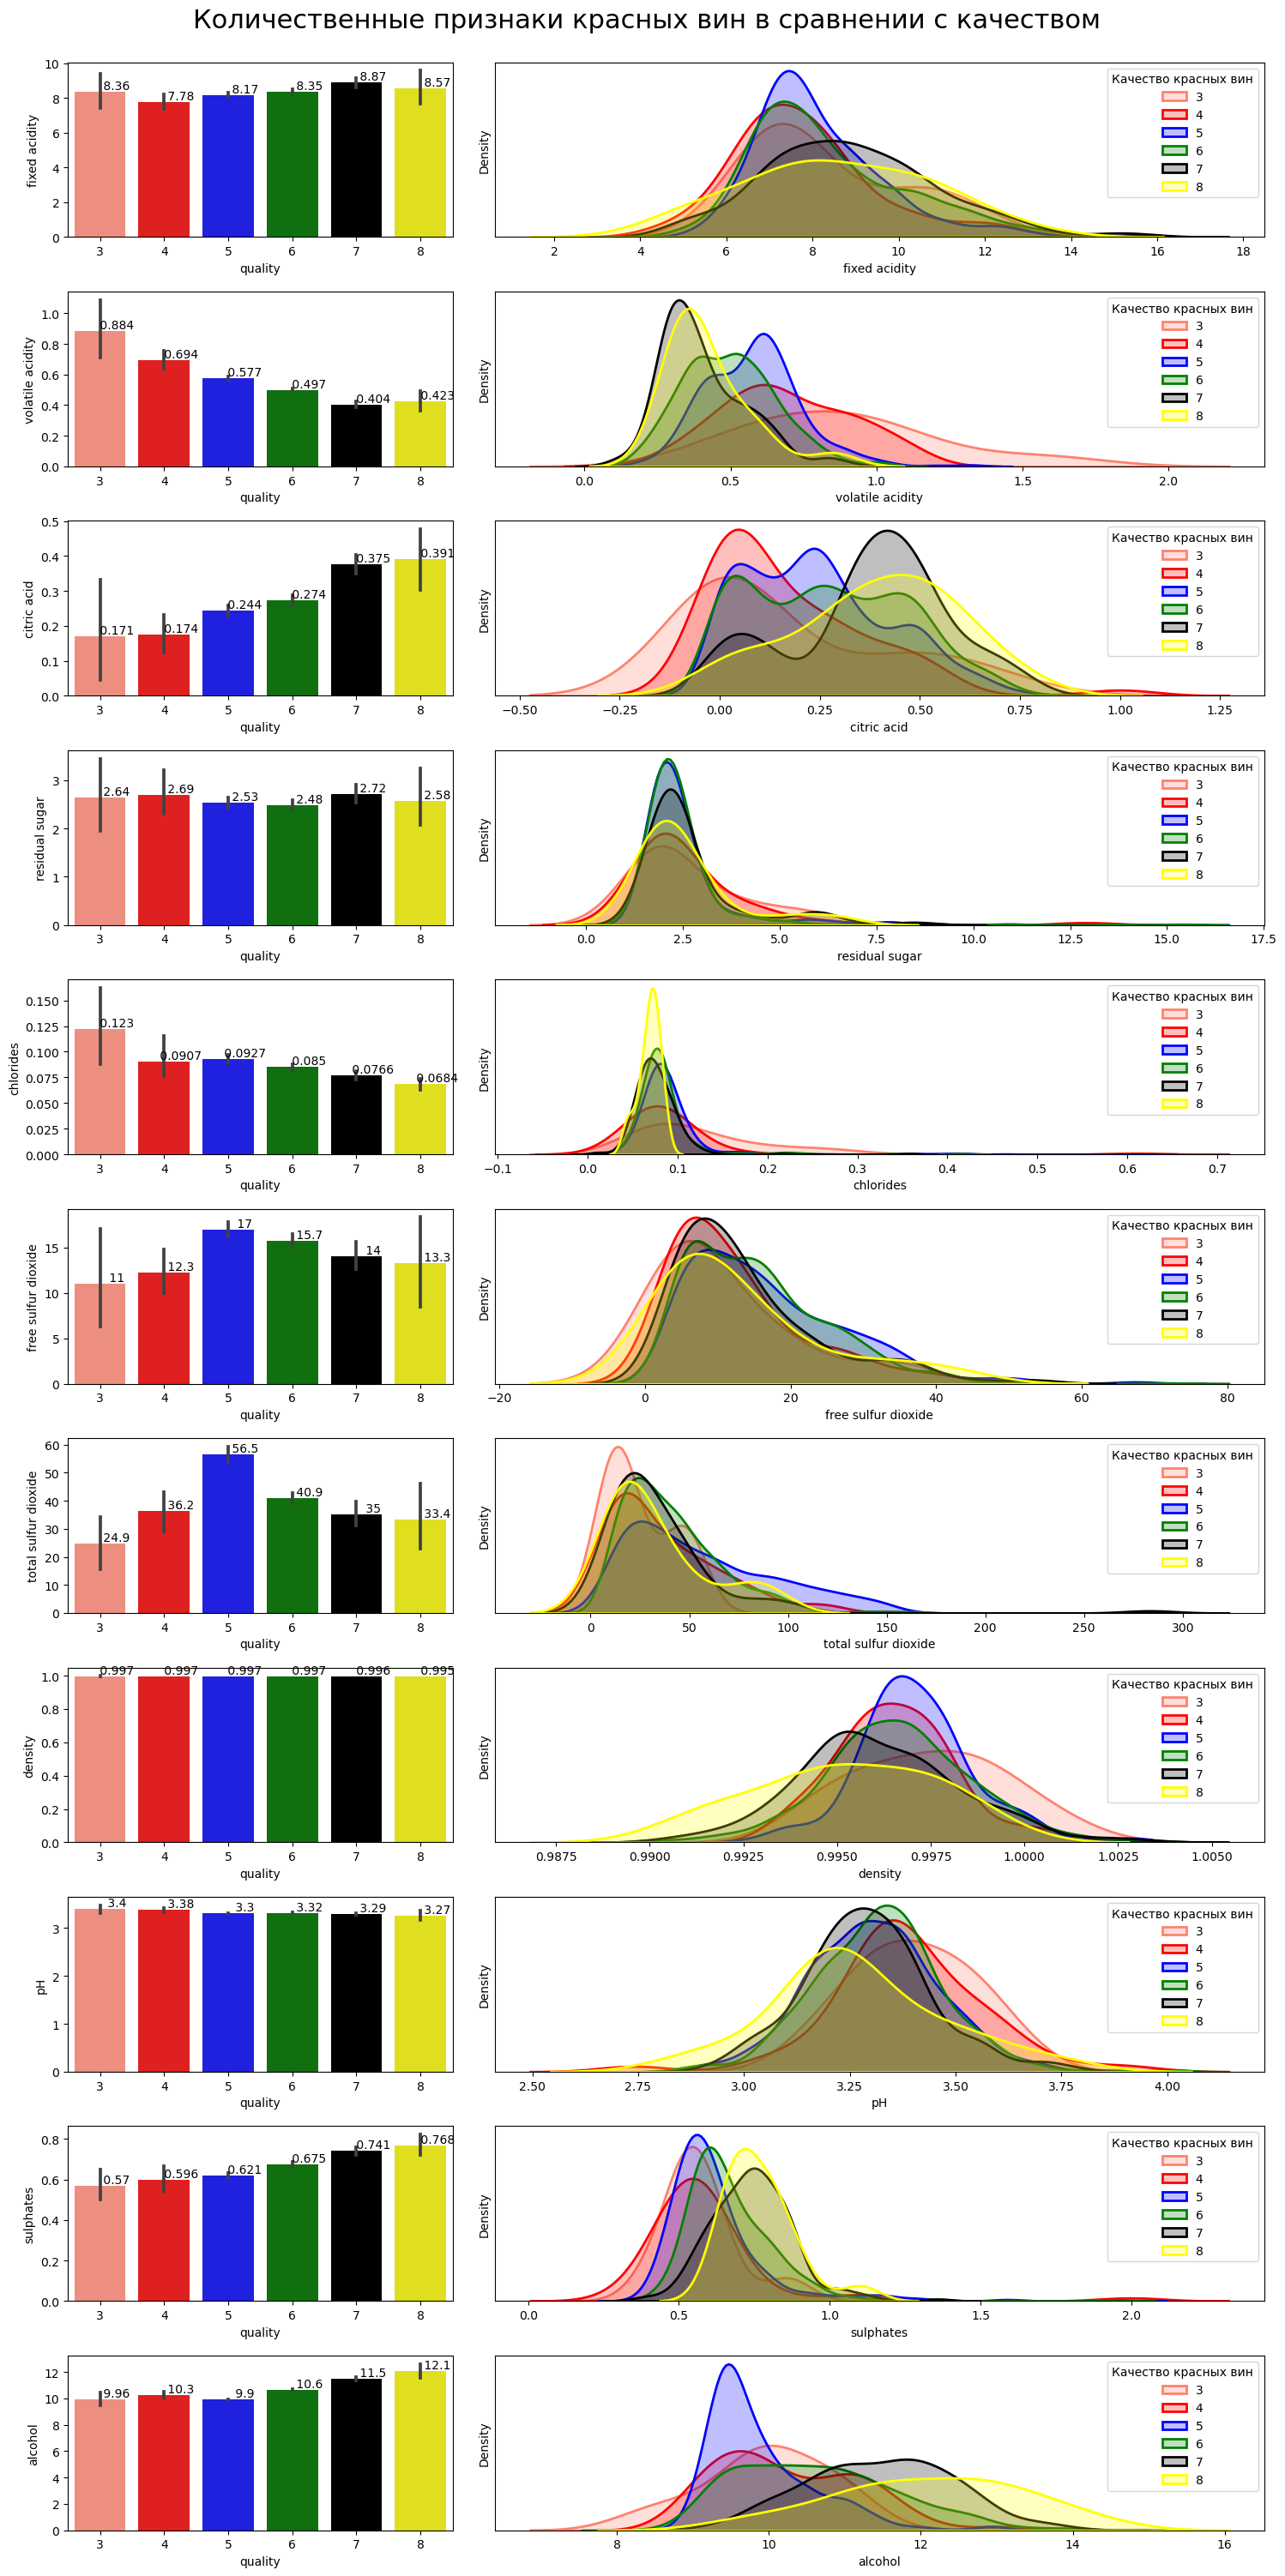

In [293]:
#Построим кривые взаимосвязи каждого признака с целевой переменной - качеством вина для красных вин

sns.set_palette(['#ff826e', 'red', 'blue', 'green', 'black', 'yellow', 'orange', 'pink', 'brown', 'purple', 'white'])
fig, ax = plt.subplots(len(df_red_wine.columns)-1, 2, figsize=(15,30), gridspec_kw={'width_ratios': [1, 2]})

# Цикл для каждого численного признака для создания линейчатых диаграмм и графиков kde
for i, col in enumerate(df_red_wine.columns[:-1]):
    # Гистограмма, показывающая среднее значение признака для каждой целевой категории
    graph = sns.barplot(data=df_red_wine, x="quality", y=col, ax=ax[i,0])

    # График KDE, показывающий распределение признака для каждой целевой категории
    sns.kdeplot(data=df_red_wine[df_red_wine["quality"]==3], x=col, fill=True, linewidth=2, ax=ax[i,1], label='3')
    sns.kdeplot(data=df_red_wine[df_red_wine["quality"]==4], x=col, fill=True, linewidth=2, ax=ax[i,1], label='4')
    sns.kdeplot(data=df_red_wine[df_red_wine["quality"]==5], x=col, fill=True, linewidth=2, ax=ax[i,1], label='5')
    sns.kdeplot(data=df_red_wine[df_red_wine["quality"]==6], x=col, fill=True, linewidth=2, ax=ax[i,1], label='6')
    sns.kdeplot(data=df_red_wine[df_red_wine["quality"]==7], x=col, fill=True, linewidth=2, ax=ax[i,1], label='7')
    sns.kdeplot(data=df_red_wine[df_red_wine["quality"]==8], x=col, fill=True, linewidth=2, ax=ax[i,1], label='8')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Качество красных вин', loc='upper right')

    # средние значения в гистограмму
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

plt.suptitle('Количественные признаки красных вин в сравнении с качеством', fontsize=22, x= 0.5 , y=1.0)
plt.tight_layout()
plt.show()

In [339]:
#посмотрим коэффициенты корреляции признаков с качеством для красных вин
corr_red=df_red_wine.corr()['quality']
corr_red

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [343]:
for i, c in enumerate(corr_red[:-1]):
    # print(i,c, df_red_wine.columns[i])
    if 0<c<0.3:
        print(f'Слабая положительная зависимость с {df_red_wine.columns[i]} = {round(c, 2)}')
    elif -0.3<=c<0:
        print(f'Слабая отрицательная зависимость с {df_red_wine.columns[i]} = {round(c, 2)}') 
    elif 0.3<=c<0.7:
        print(f'Средняя положительная зависимость с {df_red_wine.columns[i]} = {round(c, 2)}')       
    elif -0.7<c<=0.3:
        print(f'Средняя отрицательная зависимость с {df_red_wine.columns[i]} = {round(c, 2)}')       
    elif c>=0.7:
        print(f'Сильная положительная зависимость с {df_red_wine.columns[i]} = {round(c, 2)}') 
    elif c<=-0.7:
        print(f'Сильная отрицательная зависимость с {df_red_wine.columns[i]} = {round(c, 2)}') 

Слабая положительная зависимость с fixed acidity = 0.12
Средняя отрицательная зависимость с volatile acidity = -0.39
Слабая положительная зависимость с citric acid = 0.23
Слабая положительная зависимость с residual sugar = 0.01
Слабая отрицательная зависимость с chlorides = -0.13
Слабая отрицательная зависимость с free sulfur dioxide = -0.05
Слабая отрицательная зависимость с total sulfur dioxide = -0.19
Слабая отрицательная зависимость с density = -0.17
Слабая отрицательная зависимость с pH = -0.06
Слабая положительная зависимость с sulphates = 0.25
Средняя положительная зависимость с alcohol = 0.48


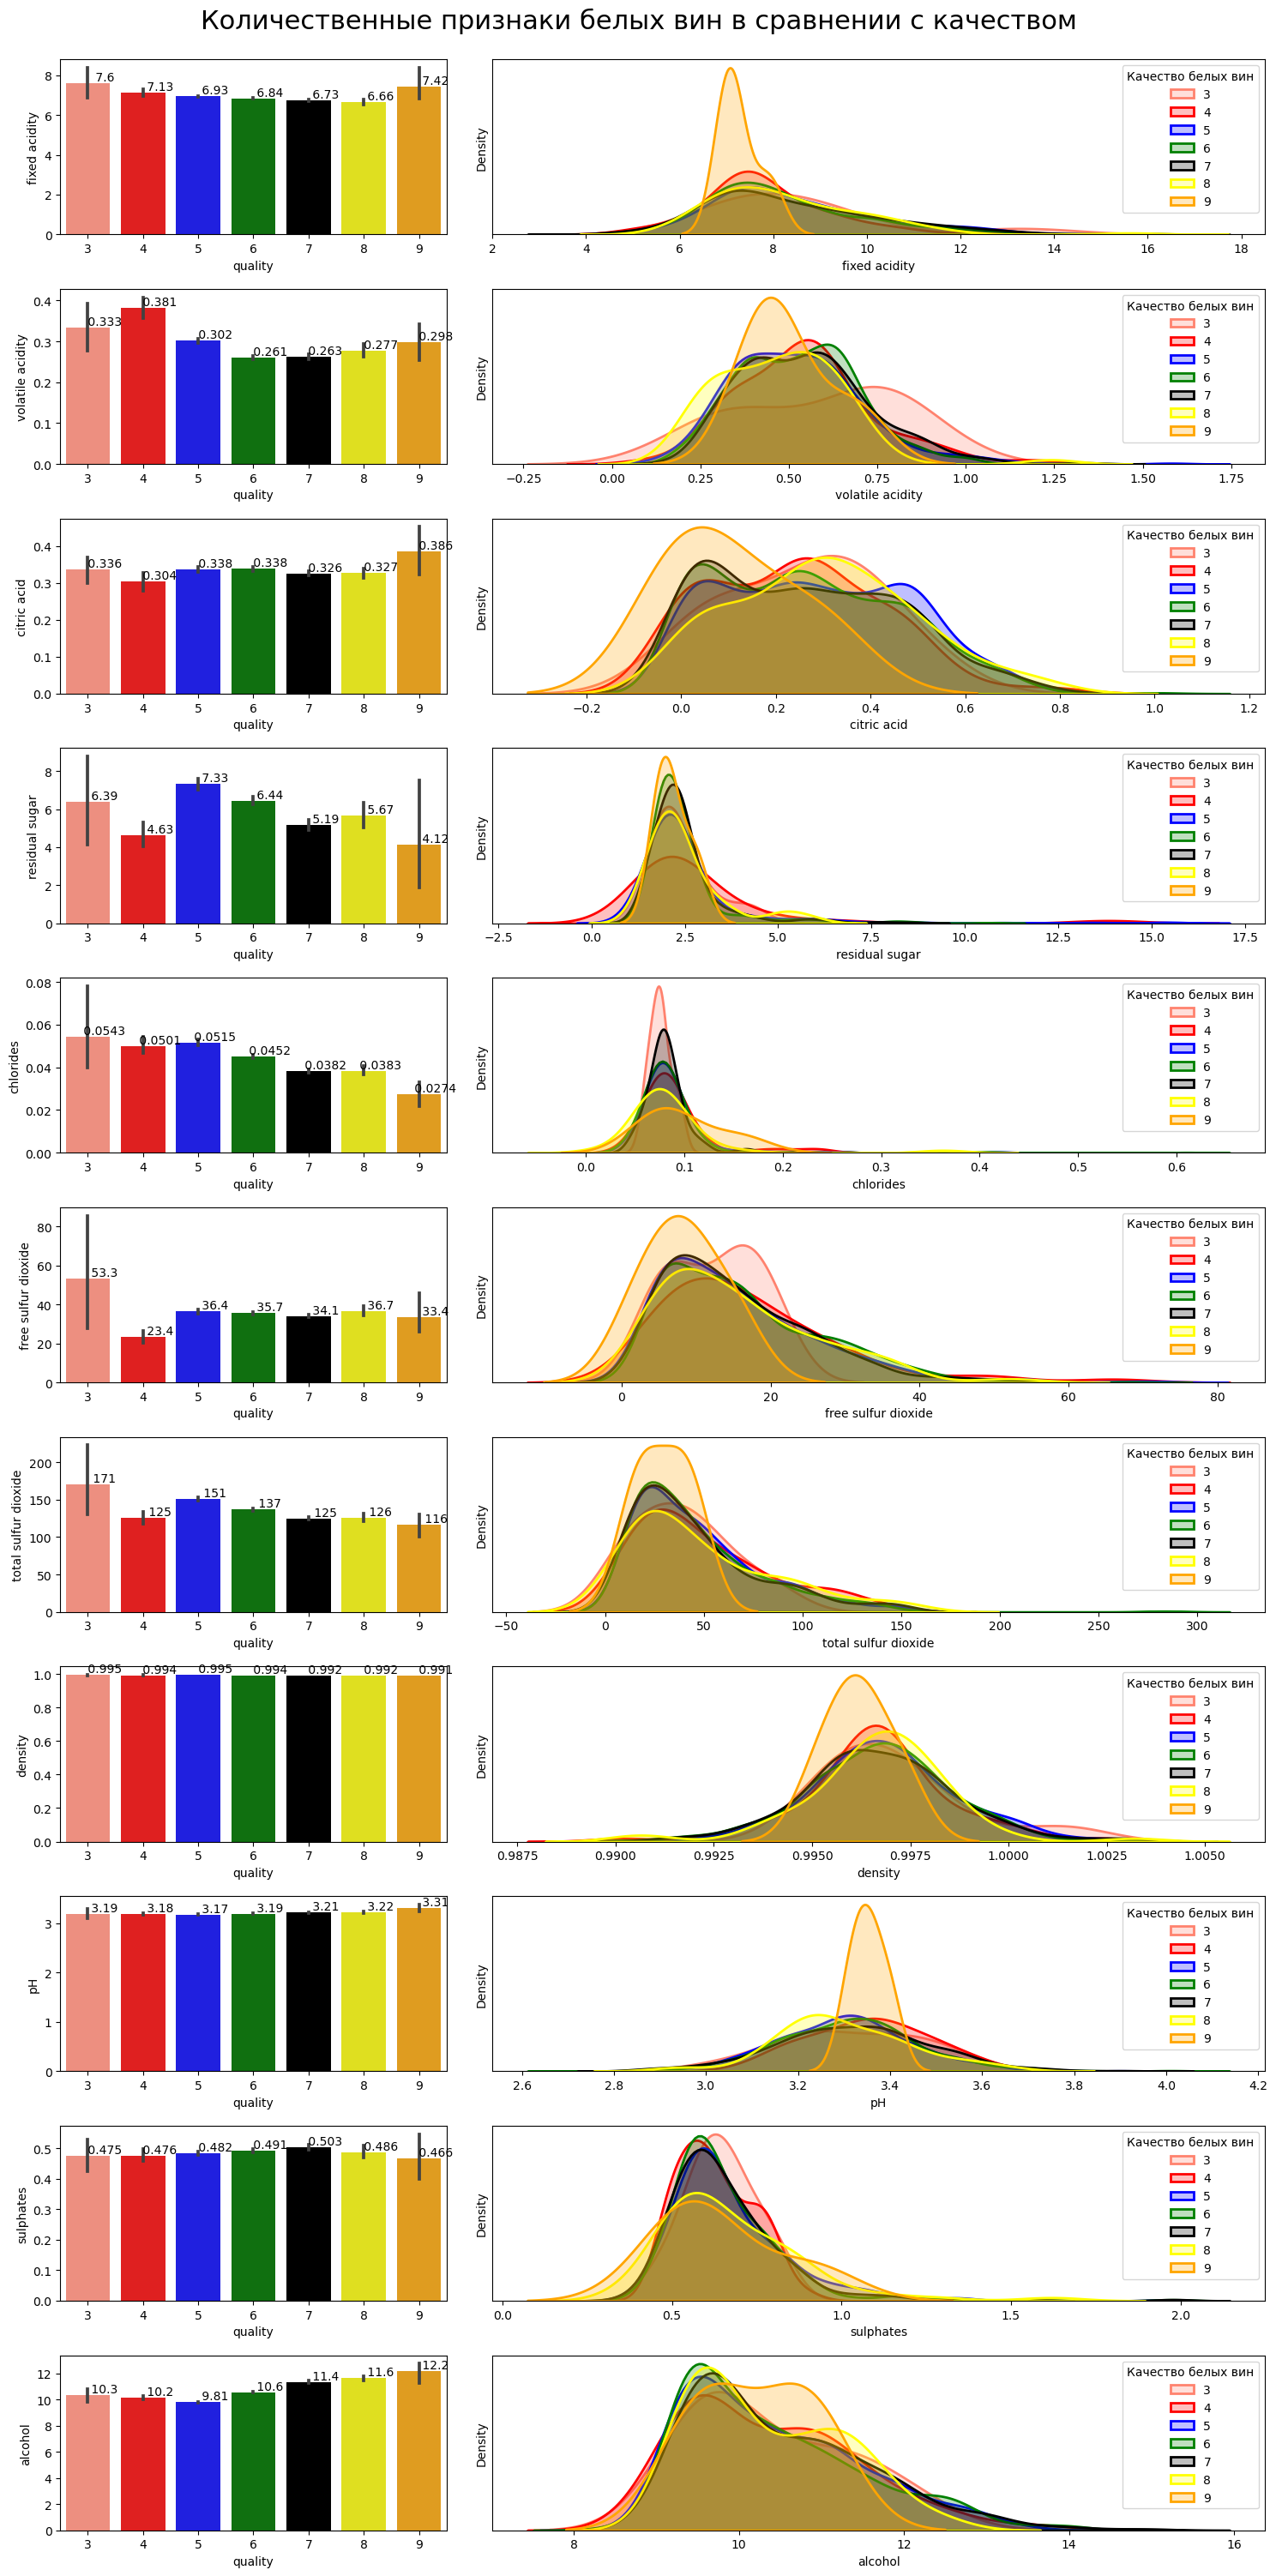

In [305]:
#Проделаем тоже самое для белых вин:
#Построим кривые взаимосвязи каждого признака с целевой переменной - качеством вина для белых вин

sns.set_palette(['#ff826e', 'red', 'blue', 'green', 'black', 'yellow', 'orange', 'pink', 'brown', 'purple', 'white','gray'])
fig, ax = plt.subplots(len(df_white_wine.columns)-1, 2, figsize=(15,30), gridspec_kw={'width_ratios': [1, 2]})

# Цикл для каждого численного признака для создания линейчатых диаграмм и графиков kde
for i, col in enumerate(df_white_wine.columns[:-1]):
    # Гистограмма, показывающая среднее значение признака для каждой целевой категории
    graph = sns.barplot(data=df_white_wine, x="quality", y=col, ax=ax[i,0])

    # График KDE, показывающий распределение признака для каждой целевой категории
    sns.kdeplot(data=df_red_wine[df_white_wine["quality"]==3], x=col, fill=True, linewidth=2, ax=ax[i,1], label='3')
    sns.kdeplot(data=df_red_wine[df_white_wine["quality"]==4], x=col, fill=True, linewidth=2, ax=ax[i,1], label='4')
    sns.kdeplot(data=df_red_wine[df_white_wine["quality"]==5], x=col, fill=True, linewidth=2, ax=ax[i,1], label='5')
    sns.kdeplot(data=df_red_wine[df_white_wine["quality"]==6], x=col, fill=True, linewidth=2, ax=ax[i,1], label='6')
    sns.kdeplot(data=df_red_wine[df_white_wine["quality"]==7], x=col, fill=True, linewidth=2, ax=ax[i,1], label='7')
    sns.kdeplot(data=df_red_wine[df_white_wine["quality"]==8], x=col, fill=True, linewidth=2, ax=ax[i,1], label='8')
    sns.kdeplot(data=df_red_wine[df_white_wine["quality"]==9], x=col, fill=True, linewidth=2, ax=ax[i,1], label='9')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Качество белых вин', loc='upper right')

    # средние значения в гистограмму
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

plt.suptitle('Количественные признаки белых вин в сравнении с качеством', fontsize=22, x= 0.5 , y=1.0)
plt.tight_layout()
plt.show()

In [344]:
#посмотрим коэффициенты корреляции признаков с качеством для белых вин
corr_white=df_white_wine.corr()['quality']
corr_white

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

In [345]:
for i, c in enumerate(corr_white[:-1]):

    if 0<c<0.3:
        print(f'Слабая положительная зависимость с {df_red_wine.columns[i]} = {round(c, 2)}')
    elif -0.3<=c<0:
        print(f'Слабая отрицательная зависимость с {df_red_wine.columns[i]} = {round(c, 2)}') 
    elif 0.3<=c<0.7:
        print(f'Средняя положительная зависимость с {df_red_wine.columns[i]} = {round(c, 2)}')       
    elif -0.7<c<=0.3:
        print(f'Средняя отрицательная зависимость с {df_red_wine.columns[i]} = {round(c, 2)}')       
    elif c>=0.7:
        print(f'Сильная положительная зависимость с {df_red_wine.columns[i]} = {round(c, 2)}') 
    elif c<=-0.7:
        print(f'Сильная отрицательная зависимость с {df_red_wine.columns[i]} = {round(c, 2)}') 

Слабая отрицательная зависимость с fixed acidity = -0.11
Слабая отрицательная зависимость с volatile acidity = -0.19
Слабая отрицательная зависимость с citric acid = -0.01
Слабая отрицательная зависимость с residual sugar = -0.1
Слабая отрицательная зависимость с chlorides = -0.21
Слабая положительная зависимость с free sulfur dioxide = 0.01
Слабая отрицательная зависимость с total sulfur dioxide = -0.17
Средняя отрицательная зависимость с density = -0.31
Слабая положительная зависимость с pH = 0.1
Слабая положительная зависимость с sulphates = 0.05
Средняя положительная зависимость с alcohol = 0.44


Исходя из графиков kde и коэффициентов корреляции можно сделать следующие выводы.
Для красных вин можно предположить:
среднюю отрицательную степень корреляции между quality и volatile acidity = -0.39,
cреднюю положительная зависимость с alcohol = 0.48, 
cлабую положительную зависимость с citric acid = 0.23,
слабую положительную зависимость с sulphates = 0.25.
Для белых вин можно предположить:
среднюю отрицательную зависимость с density = -0.31,
седнюю положительная зависимость с alcohol = 0.44,
слабую отрицательную зависимость с chlorides = -0.21.
Таким образом из общих зависимостей между качеством для красных и белых вин можно выделить зависимость от количества алкоголя. В остальном зависимости разные, вплоть до знаков.
